In [37]:
import pandas as pd
import random

# Load the dataset
file_path = 'ratings_with_product_names.csv'  # Replace with your dataset path
df = pd.read_csv(file_path)

# Define categories and subcategories
categories = ['A', 'B', 'C', 'D', 'E']  # Categories
subcategories_per_category = 3  # Number of subcategories per category

# Generate subcategories for each category (e.g., A1, A2, A3, ..., B1, B2, B3)
subcategories = [f"{cat}{i+1}" for cat in categories for i in range(subcategories_per_category)]

# Assign subcategories cyclically to the dataset rows
df['subcategory'] = random.choices(subcategories, k=len(df))

# Extract the main category (e.g., A from A1)
df['category'] = df['subcategory'].str[0]

# Structured total reviews (e.g., 10,000, 8,000, 6,000 for each subcategory)
base_reviews = 10000  # Start with 10,000 reviews for the first product
review_step = 4000  # Difference of 2,000 reviews between subcategories

# Create a dictionary to hold total reviews for each subcategory
subcategory_reviews = {}
for i, subcategory in enumerate(subcategories):
    subcategory_reviews[subcategory] = base_reviews - (i % subcategories_per_category) * review_step

# Assign total reviews to each subcategory in the dataset
df['total_reviews'] = df['subcategory'].map(subcategory_reviews)

# Assign structured ratings based on total reviews
def assign_rating(total_reviews):
    if total_reviews >= 10000:
        return random.choices([4, 5], weights=[0.4, 0.6])[0]  # Higher ratings for top reviews
    elif total_reviews >= 8000:
        return random.choices([3, 4, 5], weights=[0.2, 0.3, 0.5])[0]
    else:
        return random.choices([2, 3, 4], weights=[0.3, 0.4, 0.3])[0]  # Lower ratings for fewer reviews

df['rating'] = df['total_reviews'].apply(assign_rating)

# Map ratings to sentiments
def map_sentiment(rating):
    if rating <= 2:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:
        return 'positive'

df['sentiment'] = df['rating'].apply(map_sentiment)

# Save the updated dataset
df.to_csv('ratings_with_structured_reviews.csv', index=False)
print("Dataset saved with structured reviews as ratings_with_structured_reviews.csv")

# Display a sample of the updated dataset
print(df[['subcategory', 'total_reviews', 'rating', 'sentiment']].head(20))


Dataset saved with structured reviews as ratings_with_structured_reviews.csv
   subcategory  total_reviews  rating sentiment
0           C2           6000       3   neutral
1           A2           6000       3   neutral
2           D3           2000       3   neutral
3           C1          10000       4  positive
4           C2           6000       3   neutral
5           D2           6000       4  positive
6           A1          10000       4  positive
7           B1          10000       4  positive
8           A3           2000       3   neutral
9           C3           2000       3   neutral
10          D1          10000       5  positive
11          E1          10000       5  positive
12          C3           2000       4  positive
13          C1          10000       5  positive
14          E1          10000       4  positive
15          B1          10000       5  positive
16          D2           6000       2  negative
17          D3           2000       2  negative
18         

In [38]:
# Load the dataset with categories and subcategories
df = pd.read_csv('ratings_with_categories.csv')

# Ensure sentiment exists (map ratings to sentiments if not already done)
def map_sentiment(rating):
    if rating <= 2:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:
        return 'positive'

df['sentiment'] = df['rating'].apply(map_sentiment)

# Group by subcategory and calculate summary metrics
subcategory_summary = df.groupby(['category', 'subcategory']).agg(
    avg_rating=('rating', 'mean'),
    total_reviews=('rating', 'max'),
    positive_reviews=('sentiment', lambda x: (x == 'positive').sum()),
    neutral_reviews=('sentiment', lambda x: (x == 'neutral').sum()),
    negative_reviews=('sentiment', lambda x: (x == 'negative').sum())
).reset_index()

# Round off the average rating to 1 decimal place
subcategory_summary['avg_rating'] = subcategory_summary['avg_rating'].round(1)

# Save the subcategory summary
subcategory_summary.to_csv('subcategory_summary.csv', index=False)
print("Subcategory summary saved as subcategory_summary.csv")

# Display the summary for verification
print(subcategory_summary)


# Identify the best subcategory in each category
best_subcategories = subcategory_summary.loc[
    subcategory_summary.groupby('category')['avg_rating'].idxmax()
]

print("Best subcategories by category:")
print(best_subcategories)



Subcategory summary saved as subcategory_summary.csv
   category subcategory  avg_rating  total_reviews  positive_reviews  \
0         A          A1         4.0              5             51935   
1         A          A2         4.0              5             51714   
2         A          A3         4.0              5             51676   
3         B          B1         4.0              5             51913   
4         B          B2         4.0              5             51774   
5         B          B3         4.0              5             51459   
6         C          C1         4.0              5             51908   
7         C          C2         4.0              5             51574   
8         C          C3         4.0              5             51536   
9         D          D1         4.0              5             51343   
10        D          D2         4.0              5             51524   
11        D          D3         4.0              5             51571   
12        E

In [40]:
# Map ratings to sentiment
def map_sentiment(rating):
    if rating <= 2:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:
        return 'positive'

df['sentiment'] = df['rating'].apply(map_sentiment)

# Save the updated dataset to a new file
df.to_csv('ratings_with_sentiment.csv', index=False)
print("Updated dataset saved as ratings_with_sentiment.csv")

Updated dataset saved as ratings_with_sentiment.csv


Sentiment counts:
 sentiment
positive    774172
negative    190893
neutral      83509
Name: count, dtype: int64


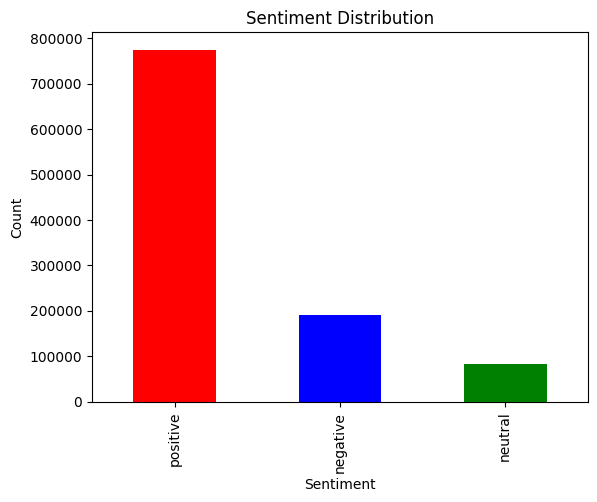

In [41]:
import matplotlib.pyplot as plt
sentiment_counts = df['sentiment'].value_counts()
print("Sentiment counts:\n", sentiment_counts)

# Plot sentiment distribution
sentiment_counts.plot(kind='bar', color=['red', 'blue', 'green'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [42]:
# Load the dataset
file_path = 'ratings_with_sentiment.csv'  # Updated dataset file
df = pd.read_csv(file_path)

# Add a mapping of product_id to product_name (if missing in dataset)
product_map = {
    132793040: 'Product A',
    321732944: 'Product B',
    439886341: 'Product C'
}

if 'product_name' not in df.columns:
    df['product_name'] = df['product_id'].map(product_map)

# Group by product and calculate average rating and sentiment counts
product_summary = df.groupby('product_name').agg(
    avg_rating=('rating', 'mean'),
    total_reviews=('rating', 'count'),
    positive_reviews=('sentiment', lambda x: (x == 'positive').sum()),
    neutral_reviews=('sentiment', lambda x: (x == 'neutral').sum()),
    negative_reviews=('sentiment', lambda x: (x == 'negative').sum())
).reset_index()

# Save the summary to a CSV file
product_summary.to_csv('product_summary.csv', index=False)
print("Product summary saved as product_summary.csv")

Product summary saved as product_summary.csv
